Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)         4

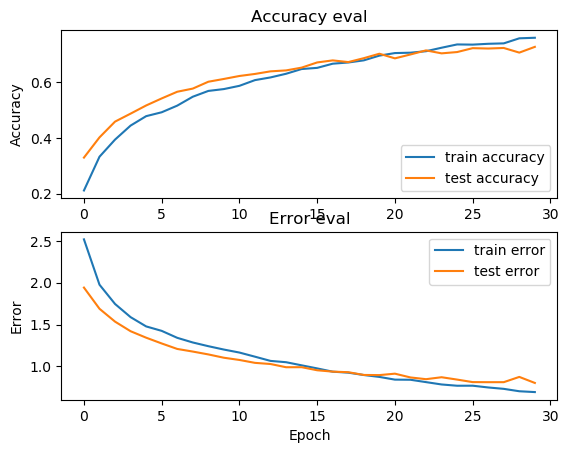

79/79 - 0s - loss: 0.8490 - accuracy: 0.7099

Test accuracy: 0.7098839282989502
Target: 9, Predicted label: [8]


In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "mfcc.json"


def load_data(data_path):
    #Loads training dataset from json file.
        
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    #Plots accuracy/loss for training/validation set as a function of the epochs     

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    #Loads data and splits it into train, validation and test sets.    

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    #Generates CNN model


    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):
    #Predict a single sample using the trained model


    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

In [2]:
X_train

array([[[[-1.78447861e+02],
         [ 1.87453766e+02],
         [-1.34707460e+01],
         ...,
         [ 3.52320135e-01],
         [ 4.26986265e+00],
         [-1.38475342e+01]],

        [[-1.88962021e+02],
         [ 1.88782806e+02],
         [-1.58921661e+01],
         ...,
         [ 2.42134809e+00],
         [ 2.12941813e+00],
         [-1.07466593e+01]],

        [[-1.98781296e+02],
         [ 1.87351822e+02],
         [-1.63597946e+01],
         ...,
         [-4.01351976e+00],
         [-1.46661854e+00],
         [-7.47359657e+00]],

        ...,

        [[-1.38974274e+02],
         [ 1.09987358e+02],
         [-3.79549866e+01],
         ...,
         [-7.50539684e+00],
         [-1.09542370e+00],
         [-1.09319611e+01]],

        [[-1.50493118e+02],
         [ 1.44935684e+02],
         [-2.62232819e+01],
         ...,
         [-9.05338192e+00],
         [-2.82159615e+00],
         [-1.68012962e+01]],

        [[-2.06961182e+02],
         [ 1.77687424e+02],
         [

In [4]:
X_test

array([[[[-3.72848892e+01],
         [ 1.12575401e+02],
         [-1.88678303e+01],
         ...,
         [ 1.30990734e+01],
         [-8.88200951e+00],
         [-1.36354637e+01]],

        [[-4.75688324e+01],
         [ 1.10053085e+02],
         [-1.40312748e+01],
         ...,
         [ 7.27212429e+00],
         [-8.51204109e+00],
         [-1.66863174e+01]],

        [[-5.79469452e+01],
         [ 1.03391739e+02],
         [-1.02473335e+01],
         ...,
         [ 4.05510855e+00],
         [-1.02126026e+01],
         [-1.60284595e+01]],

        ...,

        [[-1.33529449e+02],
         [ 1.44356064e+02],
         [-1.13953800e+01],
         ...,
         [-2.30975914e+00],
         [-6.05569541e-01],
         [ 1.50796103e+00]],

        [[-1.26880005e+02],
         [ 1.46075165e+02],
         [-7.97806835e+00],
         ...,
         [-7.60311604e+00],
         [-1.99598980e+00],
         [ 3.08878946e+00]],

        [[-1.34169540e+02],
         [ 1.64136414e+02],
         [